# CNN ( Convolution Neural Network)_ 적분
    _ cnn은 주변값을 고려하여 특징추출 _ 이것에 filter가 필요함 
- 모델이 직접 이미지, 비디오, 텍스트 또는 사운드를 분류하는 머신 러닝의 한 유형인 딥러닝에 가장 많이 사용되는 알고리즘\
- CNN은 이미지에서 객체, 얼굴, 장면을 인식하기 위해 패턴을 찾는 데 특히 유용합니다. CNN은 데이터에서 직접 학습하며, 패턴을 사용하여 이미지를 분류하고 특징을 수동으로 추출할 필요가 없습니다.

- 신경망의 기본은 ffnn이고 cnn은 앞단에서 특징추출 
- cnn으로 특징추출하고 ffnn 실행

**특징**
- flattern 으로 일렬로 만들어줘야함
- 이미지의 경우 일렬로 만들면 특징추출이 어려워진다 eg) 얼굴의 경우 눈 옆에 코 코옆에 입 이런식으로 
    - 그래서 1 .이미지 원본에 filter적용_ 필터 사이즈가 크면 큰특징, 작으면 작은 특징 # 갯수 구하는 식은  -n+1 (n은 필터크기)
    - 2. 이를 통해 필터의 주변이미지 특징값을 고려하여 곱합_ 중복되는 값이 생기기도함 
    - 3. 이를 다 더해줌 : 적분과 비슷   
    - 필터를 여러개 쌓아서 여러개의 특징을 뽑아냄
    - random으로 초기화시키고 어떤필터를 적용시키면 될지 학습함 
    - 특징을 필터로 뽑아내면 끝에 테두리 값은 없어진다 . 이것을 padding으로 값을 채움 100x100 => filter 98x98 => padding 100x100
    -  pooling으로 강제로 줄여줌 _ max / average 등의 방법으로 pooling
        - (필터를 통해 값을 추출하면 중복값이 생기기 때문에 줄여도 특징추출 문제 x)
    - 이미지는 기본적으로 3차원 ( 가로 세로 RGB )
        - 색상이 중요하지않은 이미지(형태가 중요한것)는 흑백으로 줄여서해야 사이즈 준다
    - 필터를 증가시키는 이유는 여러 필터를 이용해서 특징 추출 / 이미 2차원을 적용하기위해서 3차원 값 도출
         -  가중치를 부과하는 것과 비슷한 맥락?
    - DEEP(레이어가 증가할수록)해질수록 정확해짐 
    
[중요개념 ]

- stride : 연산자:건너뛰기 _특징을 추출할떄 이미 주변을 고려했기 때문에 한칸이 아닌 두칸세칸씩 건너뛰면서 특징추출 _ 적분연산
- filter : 특징을 어떻게 추출할것인지  _ 필터 사이즈 때문에 주변값 손실해서
- padding:으로 주변값으로  채워줌
- pooling 주변값을 고려해서 특징추출해서 중복값 발생_ 그래서 값을 줄여줌

# FFNN

- 이미지의 숫자 예측
- 0~ 9까지의 숫자를 이미지화_ 인식 eg 자동차 번호판

## MNIST `모델만들기

In [50]:
import warnings
warnings.filterwarnings(action='ignore')

In [51]:
from tensorflow.examples.tutorials.mnist import input_data
# target : 열자리중 하나로 표현 eg) 1000000000 
mnist =input_data.read_data_sets('/tmp/data/',one_hot=True)  # 다운로드 위치와 원핫인코딩
import tensorflow as tf

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Q : BATCH SIZE  128이 전체이미지를 다가져오는거?
            DISPLAY STEP ?

In [52]:
# 128장의 이미지를 랜덤하게 공급
batch_x,batch_y = mnist.train.next_batch(128)  #배치엑스는 이미지 와이는 타겟 
print(batch_x.shape) # 128장 * 784(28x28) => 이미지가 flattern 되었다는 의미  _ flattern이 이미 되어서 나옴
learning_rate =0.1 # 하이퍼파라미터 
num_steps =500 #epoch 세대
batch_size = 128 # mini batch  사이즈  : 속도를 고속, local해 때문에 미니배치
display_step = 100 #시각화

(128, 784)


### Q hidden layer 개수?

In [53]:
#히든레이어가 2개 
# 784( 픽셀하나를 변수로 봄) => 784(입력) x 256 => 256x256 => 256 x10
n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_classes =10  #target 이 0 ~ 9 
X = tf.placeholder('float',[None,num_input]) #128장 x 784픽셀 #none 은 크기 미지정
Y = tf.placeholder('float',[None,num_classes]) #128장 x 10개 (원핫인코딩)

### Q 가중치 부여가 OUT 단계에서도?

 TF.RANDOM_NORMAL로 주는 이유?

In [54]:
#가중치 = 설명력 = 계수 
# 
weights ={  # 784x256 , 256x256 , 256x10  :가중치 덩어리 세개  # 이게 학습되어야 모델이 완성
    'h1':tf.Variable(tf.random_normal([num_input,n_hidden_1])), # 인풋에다가 히든레이어 통과 시켜주기 (가중치 부여)
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])), # H1 을 레이어 2번쨰거에 통과
    'out':tf.Variable(tf.random_normal([n_hidden_2,num_classes])) #H2를  아웃풋
}
#bias = activation 
biases = {  #가중치 한덩어리당 bias 하나 반드시 존재 
    'b1':tf.Variable(tf.random_normal([n_hidden_1])), #가중치가 존재하는 변수만큼 존재 
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([num_classes]))
}

In [55]:
# 뉴럴네트워크 망 생성 
def neural_net(x):  # x는 128x784  #layer_1은 가중치를 계산하고 나온 놈   # Y = AX + B 
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1']) # x와 곱해줌 / h1 : 784x256 , layer_1 : 128x256
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2']) # 128 x 256 * 256x256 => 128x256
                   
    # 128x256  가중치 : 256x10 => 128 x 10 :타겟사이즈와 동일
    out_layer = tf.matmul(layer_2,weights['out'])+biases['out']
    return out_layer  # 128 x 10

adagrad : learning -rate 처음에는 크다가 점점작게  0으로 

이걸 쓰다가  momentum + propgrad() : 로 넘어옴  adaptive 적응적


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

### Q 코드 모르겠음

In [56]:

logits = neural_net(X)  # 128 x 10
#경사하강법 => 미분가능 => 분류 
loss_op = tf.reduce_mean( #원핫인코드된값* log(확률값)       # softmax 확률값으로 계산            
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)) #Adam 최적화기 : momentum + propgrad() 합친것
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) #최적화기 : 기울기 , 학습율
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1)) #가장 큰값의 인덱스를 구함(원핫인코딩) => target
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) #cast :데이터 형변환 
init = tf.global_variables_initializer()

#######init = tf.global_variables_initializer() ####← 이거 나올떄까지가 모델 만들기

## 실행부

### Q : 코드,,

In [58]:
with tf.Session() as sess: # GPU 네트워크 연결 => 일반화
    sess.run(init)
    for step in range(1, num_steps+1): # epoch
        # #batch_x :128x784  batch_y : 128x10
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if step % display_step ==0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:batch_x, Y:batch_y})
            print('Step'+str(step)+'Minibatch Loss  : {:.4f}'.format(loss)+', Training Accuracy : {:.3f}'.format(acc))
    print('테스트 정확도 : \n',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Step1Minibatch Loss  : 11025.7832, Training Accuracy : 0.289
Step100Minibatch Loss  : 494.5671, Training Accuracy : 0.875
Step200Minibatch Loss  : 105.2701, Training Accuracy : 0.852
Step300Minibatch Loss  : 111.3374, Training Accuracy : 0.852
Step400Minibatch Loss  : 58.4010, Training Accuracy : 0.852
Step500Minibatch Loss  : 55.1440, Training Accuracy : 0.891
테스트 정확도 : 
 0.8476


# boston 집값 예측 _회귀 
boston 집값 예측

### Q : CONST 왜 0

In [60]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import tensorflow as tf
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['const'] =np.ones(df.shape[0])
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1.0


In [64]:
n,m =df.shape
print(n,m) #506개 data point x 14개 변수 
X = tf.placeholder(tf.float64 , shape =(n,m)) # 506x14
y = tf.placeholder(tf.float64, shape =(n,1)) #14x506
XT = tf.transpose(X)


506 14


### Q 전치로 가중치 구하는 과정?

In [65]:
# 가중치 학습하는게 없다
# 행렬식으로 구함  # XT는 X의 전치 
# 행렬의 거듭제곱하면 상관계수가 만들어짐  #14x506 * 506x14 => 14x14 상관행렬 (두변수간의 관계가 만들어짐 ) => 역행렬 14x14 
# 14x14 , 14x506 => 14x506
# 14x506 ,506x1 +> 14x1 

#역행렬 이용해서 가중치 결정

# y = ax -> a = y/x # 변수간의 관계 => 역행렬 
w = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)
y_pred =tf.matmul(X,w) #506x14, 14x1 => 506x1 회귀식
with tf.Session() as sess:
    y_pred_ = sess.run(y_pred, feed_dict={X:df.values,y:boston.target.reshape(-1,1)})

print('예측한 집값:',y_pred_[19],'실제 집값:',boston.target[19])

예측한 집값: [18.40613603] 실제 집값: 18.2


# Kmeans

- k가 결정되어야함 . k 개의 중심 생성
- 각 데이터의 중심값을 빼서 거리값을 계산
- 중심이 계속 변한다 

## tile

- 타일은 차수를 확대하지만 차원을 확대하진않는다 

In [66]:
# tile 1

import tensorflow as tf
sess =tf.Session()

val=[0,2,3]
val=tf.tile(val,[5]) #tile :옆으로 반복
print('홑일 때',sess.run(val)) 


홑일 때 [0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]


In [68]:
val =[[1,1,1,],[2,2,2],[3,3,3]] #3x3
val = tf.tile(val,[5,2]) #5x2를  tile => 15x6
print('2차원일 때',sess.run(val))

2차원일 때 [[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


In [70]:
# tile 2

input_vecs=[[1.,2.],[2.,1.],[-2.,-1.]]
tiled_vecs=tf.tile(input_vecs,[1,3])
print(sess.run(tiled_vecs))
tiled_vecs =tf.tile(input_vecs,[2,3])
print(sess.run(tiled_vecs))

[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]
[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]
 [ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]


## iris

### Q IRIS 코드 전체값...

- RESHAPE 하는 이유 
- EPOCH 결과값 ?

In [8]:
import numpy as np
import  matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import scale
from tensorflow.python.framework import ops
ops.reset_default_graph() #그래프 초기화 
sess =tf.Session()
iris = datasets.load_iris() #iris : 4개의 변수와 타겟 

In [9]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [10]:
num_pts = len(iris.data) # 행수
num_feats = len(iris.data[0]) #columns 수 : 변수
k=3 #군집수
generations =25 # epoch가 25번 돌아감 
data_points = tf.Variable(iris.data) #iris 데이터 한꺼번에 받겠다

#tf.Variable(tf.zeros([num_pts] : 행수만큼 0으로 초기화하여 레이블변수 만들어줌 
cluster_labels = tf.Variable(tf.zeros([num_pts],dtype =tf.int64))

#중심데이터를 랜덤으로 취해라 # 중심하나의 요소는 4개  ( 열변수개수 )
rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)]) 
centroids = tf.Variable(rand_starts) # 중심을 저장

# 3개의 중심을  150개(pts) 이걸 reshape (150,3,4)
centroid_matrix = tf.reshape(tf.tile(centroids,[num_pts,1]),[num_pts,k,num_feats]) #num_feats 행수 150개, k 3개 , 각 변수 4개 

#데이터를 통째로 옆으로 k번(3번) 옮긴다  
point_matrix = tf.reshape(tf.tile(data_points,[1,k]),[num_pts,k,num_feats]) 

# 세번 반복된 데이터에서 중심값을 빼준다 
distances = tf.reduce_sum(tf.square(point_matrix - centroid_matrix), axis =2)

# 2개전제 (인덱스,실제값 비교 )
centroid_group = tf.argmin(distances,1) #중심거리 1, 중심거리2, 중심거리3

In [11]:
# unsorted_segment_sum :라벨번호로 값의 합계 ; 라벨(group_ids)과 값이 잇을 때 라벨을 기준으로 값을 합함
# 그룹별로 거리으ㅣ평균
#중심거리를 재계산해서 중심값을 재할당 

def data_group_avg(group_ids,data): #group(3개)별로 평균을 낸다 
    sum_total =tf.unsorted_segment_sum(data,group_ids,3)
            
    num_total = tf.unsorted_segment_sum(tf.ones_like(data),group_ids,3) #ones_like(data ): data와 사이즈는 같지만 값을 1로바꿔라
                                                                        # 1로된것을 다 더하면 그룹의 전체 요소개수가 나옴
    avg_by_group = sum_total/ num_total #합계 / 갯수 : 그룹의 평균거리
    return(avg_by_group)
means = data_group_avg(centroid_group,data_points)

# 업데이트 노드를 결정
update = tf.group(centroids.assign(means),cluster_labels.assign(centroid_group))
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
for i in range(generations): #25번 : epoch 위에서 설정
    print('Calculatinf gen {},out of {}.'.format(i,generations))
    # update: 군집의 중심값 재계산 및 그룹 변경 # centroid_group 호출 : 그룹번호 결정
    _,centroid_group_count = sess.run([update,centroid_group]) 
    group_count = []
    for ix in range(k):  #군집번호  #군집별 카운트 
        group_count.append(np.sum(centroid_group_count == ix))
        print('Group counts :{}'.format(group_count))
 # for문이 종료된 후 결정된 중심값, 할당된 군집번호 받기        
[centers,assignments] = sess.run([centroids,cluster_labels])

Calculatinf gen 0,out of 25.
Group counts :[35]
Group counts :[35, 19]
Group counts :[35, 19, 96]
Calculatinf gen 1,out of 25.
Group counts :[30]
Group counts :[30, 23]
Group counts :[30, 23, 97]
Calculatinf gen 2,out of 25.
Group counts :[28]
Group counts :[28, 25]
Group counts :[28, 25, 97]
Calculatinf gen 3,out of 25.
Group counts :[26]
Group counts :[26, 27]
Group counts :[26, 27, 97]
Calculatinf gen 4,out of 25.
Group counts :[26]
Group counts :[26, 28]
Group counts :[26, 28, 96]
Calculatinf gen 5,out of 25.
Group counts :[24]
Group counts :[24, 30]
Group counts :[24, 30, 96]
Calculatinf gen 6,out of 25.
Group counts :[23]
Group counts :[23, 31]
Group counts :[23, 31, 96]
Calculatinf gen 7,out of 25.
Group counts :[22]
Group counts :[22, 32]
Group counts :[22, 32, 96]
Calculatinf gen 8,out of 25.
Group counts :[22]
Group counts :[22, 32]
Group counts :[22, 32, 96]
Calculatinf gen 9,out of 25.
Group counts :[22]
Group counts :[22, 32]
Group counts :[22, 32, 96]
Calculatinf gen 10,o

In [81]:
#제대로 군집화되었는지 확인

def most_common(my_list): #대표성을 띈 라벨을 결정 
    return(max(set(my_list),key =my_list.count)) #set은 key의 중복을 불허 
# 0 1 2 label 결정
label0 =most_common(list(assignments[0:50]))
label1 =most_common(list(assignments[50:100]))
label2 =most_common(list(assignments[100:150]))
#라벨과 일치여부 확인 
group0_count = np.sum(assignments[0:50]==label0)
group1_count = np.sum(assignments[50:100]==label1)
group2_count = np.sum(assignments[100:150]==label2)

accuracy = (group0_count + group1_count + group2_count)/150.
print('Acccuracy:{:.2}'.format(accuracy))

ACccuracy:0.89


# Tic tac toe

https://github.com/nfmcclure/tensorflow_cookbook/blob/master/06_Neural_Networks/08_Learning_Tic_Tac_Toe/tic_tac_toe_moves.py

In [ ]:
import csv
import random
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:

response=6
batch_size=50
symmetry = ['rotate180', 'rotate90', 'rotate270', 'flip_v', 'flip_h']

In [ ]:
# 말판 만들기 
def print_board(board):     # 말판찍는다 
    symbols = ['O',' ','X']  # 유저, 컴퓨터 
    board_plus1 = [int(x) + 1 for x in board]
    print(' ' + symbols[board_plus1[0]] + ' l '
          + symbols[board_plus1[1]]
          + ' l ' + symbols[board_plus1[2]])
    print('__________')
    print(' ' + symbols[board_plus1[3]] + ' l ' 
         +symbols[board_plus1[4]]
          + ' l ' + symbols[board_plus1[5]])
    print('__________')
    print(' ' + symbols[board_plus1[6]] + ' l ' 
         +symbols[board_plus1[7]]
          + ' l ' + symbols[board_plus1[8]])

In [ ]:
# 같은 상황을 해결하고 다양한 경우를 충족하기 위해 변화
def get_symmetry(board, play_response, transformation):
    """
    :param board: list of integers 9 long:
     opposing mark = -1
     friendly mark = 1
     empty space = 0
    :param play_response: integer of where response is (0-8)
    :param transformation: one of five transformations on a board:
     'rotate180', 'rotate90', 'rotate270', 'flip_v', 'flip_h'
    :return: tuple: (new_board, new_response)
    """
    if transformation == 'rotate180':      # 180도만 보면 1번이 말을 놓을자리이다. 이걸 180도 돌리면 1번위치가, 7번으로 간다 . >> 그래서 8에서 빼주면된다 
        new_response = 8 - play_response           # 3번이면 180도 돌리면 5번으로 간다 
        return board[::-1], new_response
    elif transformation == 'rotate90':             
        new_response = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(play_response)
        tuple_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return [value for item in tuple_board for value in item], new_response
    elif transformation == 'rotate270':
        new_response = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(play_response)
        tuple_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return [value for item in tuple_board for value in item], new_response
    elif transformation == 'flip_v':
        new_response = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(play_response)
        return board[6:9] + board[3:6] + board[0:3], new_response
    elif transformation == 'flip_h':  # flip_h = rotate180, then flip_v
        new_response = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(play_response)
        new_board = board[::-1]
        return new_board[6:9] + new_board[3:6] + new_board[0:3], new_response
    else:
        raise ValueError('Method not implemented.')

In [ ]:
# 화일로부터 말 규칙 로딩
def get_moves_from_csv(csv_file):
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader= csv.reader(csvfile, delimiter=',')
        for row in reader:
            #0 0 0 -1 1 0 0 0 0 말위치 
            moves.append(([int(x) for x in row[0:9]], int(row[9])))
    return(moves)

In [ ]:

# 정해진 말규칙을 다양하게 변화하게 훈련용 데이터 확장
def get_rand_move(moves, n =1, rand_transforms=2):
    (board, response) = random.choice(moves)
    possible_transforms=['rotate90', 'rotate180', 'rotate270', 'flip_v', 'flip_h']
    for i in range(rand_transforms):
        random_transform = random.choice(possible_transforms)
        (board, response) = get_symmetry(board, response, random_transform)
    return(board,response)

In [ ]:
moves = get_moves_from_csv("tictactoe_moves.csv")
train_length = 500
train_set = []
for t in range(train_length):
    train_set.append(get_rand_move(moves))

In [ ]:
def init_weights(shape):
    return(tf.Variable(tf.random_normal(shape)))

In [ ]:
def model(X, A1,A2, bias1, bias2):
    layer1= tf.nn.sigmoid(tf.add(tf.matmul(X, A1), bias1))
    layer2= tf.add(tf.matmul(layer1, A2), bias2)
    return(layer2)


In [ ]:
import tensorflow as tf

In [ ]:
X = tf.placeholder(dtype=tf.float32, shape=[None,9])
Y = tf.placeholder(dtype=tf.int32, shape=[None])  # 50x1 
A1 = init_weights([9,81]) # 50x81 
bias1 = init_weights([81])
A2 = init_weights([81,9]) # 확률값 출력 # 50x9  # 확률값
bias2 = init_weights([9])
model_output=model(X,A1,A2, bias1, bias2)

loss = tf.reduce_mean(   # 분류: 1~0 사이의 확률값
    tf.nn.sparse_softmax_cross_entropy_with_logits( # 확률
    logits=model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output,1)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:

import numpy as np
loss_vec = []
for i in range(10000):
    rand_indices = np.random.choice(range(len(train_set)), batch_size, replace=False)
    batch_data = [train_set[i] for i in rand_indices]
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    sess.run(train_step, feed_dict={X: x_input, Y:y_target})
    temp_loss = sess.run(loss, feed_dict = {X: x_input, Y: y_target})
    loss_vec.append(temp_loss)
    if i%500==0:
        print('iteration ' + str(i) + ' Loss: ' + str(temp_loss))

In [ ]:

test_board=[-1,0,0,1,-1,-1,0,0,1]
train_set = [x for x in train_set if x[0] != test_board]

In [ ]:
 #게임 승패 결정
def check(board):
    wins = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8],
           [0,4,8],[2,4,6]]
    for i in range(len(wins)):
        if board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==1.:
            return(1)
        elif board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==-1.:
            return(-1)
    return(0)

In [ ]:
game_tracker= [0., 0., 0., 0., 0., 0.,0., 0., 0.]  # 맨처음에는 전부 0 
win_logical= False
num_moves = 0
while not win_logical:  
    player_index = input('이동하고 싶은 인덱스를 입력하시오(0-8):')
    num_moves += 1
    game_tracker[int(player_index)]=1.
    [potential_moves] = sess.run(model_output, feed_dict = {X: [game_tracker]})
    # 말여부를 확인해서 가능한 값ㅇ르 선택
    allowed_moves = [ix for ix,x in enumerate(game_tracker) if x==0.0]
    # 허락위치에 있는 것인지 확인 
    # 큰확률값 선택 
    model_move = np.argmax([x if ix in allowed_moves else -999.0 
                           for ix,x in enumerate(
                           potential_moves)])
    # 컴퓨터가 선택 
    game_tracker[int(model_move)] = -1.
    print('모델이 이동하였습니다.')
    print_board(game_tracker) # GUI 방식 
    if check(game_tracker) ==1 or num_moves>=20:
        print('게임 종료! 승리하셨습니다. ')
        win_logical = True
    elif check(game_tracker)==-1:
        print('게임 종료! 게임에 지셨습니다. !')
        win_logical = True

# CNN

In [13]:

# save_fig : 그림을 저장하는 함수이다 ( fig_id 라는 이름으로 저장된다 )

def save_fig(fig_id, tight_layout=True):
    path = os.path.join("./images/", fig_id + '.png') # /images/ 는 경로이다! ( 실제 images 라는 폴더가 문서안에 있어야한다)  'png' 스타일로 저장한다 
    print("Saving figure", fig_id)
    if tight_layout:  # tight_layout 이  true 라면?
        plt.tight_layout() # 기존디폴트값으로 쓰인다
    plt.savefig(path, format='png', dpi=300)  # savefig : 저장하라
                                              # dpi : dot per inch >>  인치당 300개의 점을 찍을 수 있을만큼의 해상도로 만들라

In [14]:
# tight_layout() : https://kongdols-room.tistory.com/98 참고

In [15]:
# 초기화 하는 함수
def reset_graph(seed=42): 
    tf.reset_default_graph()  #>> 초기화
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [16]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
image = china[150:220, 130:250]  # 이미지의 부분을 clipping 하는 중 (배열의 일부만 뽑아내고 있다) 
                                 # clipping = 이미지 전체 중 부분을 뽑아옴
                                 # 220-150=70,  250-130=120  >>  70(높이=행) x 120(가로=열)  
        
height, width, channels= image.shape  #  칼라면 채널이 3개이다

image_grayscale = image.mean(axis=2).astype(np.float32) # axis=2 니까 channels 이다 . 0~255 값이 나온다 >> 즉 흑백이미지로 바꿔라는뜻
images = image_grayscale.reshape(1, height, width, 1)   # 차수를 맞추려고 reshape 를 해준 ( 이미지 확장 )

### Q RESHAPE 하는 이유 , 확장 이유 

In [17]:

def plot_image(image):       # 흑백으로 찍어라  
    plt.imshow(image, cmap='gray', interpolation='nearest') # imshow : 이미지를 보여라
                                                            #interpolation='nearest' >> 데이터가 없는자리는 가까운 값으로 줘라 (보강법)
    plt.axis('off')  # 이미지니까 축은 생략

def plot_color_image(image):  # 컬러로 찍어라
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis('off')

## Filter

- 필터의 높이
- 필터의 가로
- 입력채널(컬러?)
- 출력채널(필터개수)
-순으로 데이터를 만들어야함


- 채널: 종이가 몇장인지로 이해하면 된다 

In [25]:
# filter 를 만드는 과정(필터) 


import numpy as np
fmap = np.zeros(shape=(7,7,1,2), dtype=np.float32) # 필터사이즈 7x7 (높이7,가로7),입력채널은 1개, 출력채널 2개 
                                                  # 즉 데이터1개가 들어와서 2개로 나간다 (그럼 필터가 2개가 필요하다는것!!)
                                                  
# 값을 대입해보자!!
# 인덱스 값으로 생각해야 쉬움 
fmap[:,3,0,0]=1  # 첫번째 장의( 맨마지막숫자가0이니까) 세로값의 3번째를 1로 넣겠다는 뜻 
                 # ( 7개중 3번이니까 중앙이다 ) 0,1,2,3,4,5,6중 3번에 1값을 주라!!!      # 0이면 검은색 1이면 흰색이다!!!!! 
fmap[:,:,0,0]  #>> 첫번째 장 확인하는 것

#  아래거랑 비교

fmap[3,:,0,1] = 1  # 두번째 장의(맨마지막숫자가1이니까) 의 가로값의 3번째를 1로 넣겠다는 것 
#fmap[:,:,0,1]   # >> 2번째 장 확인  ( 7,7,1,2 였고 출력장수는 2개니까 )

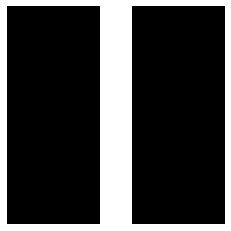

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


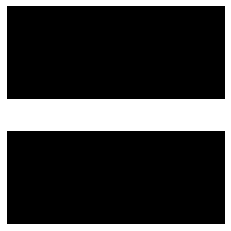

In [26]:

# array 를 그림으로 찍어보자
import matplotlib.pyplot as plt

plot_image(fmap[:,:,0,0])  # 세로가 흰색이 된다 ( 1이면 흰색이니까) 
plt.show()

print(fmap[:,:,0,0])  #그림을 좌표로 찍은 것  >>  검은색은 0 + 흰색은 1이다 

plot_image(fmap[:,:,0,1]) # 가로가 흰색 
plt.show()

In [31]:
reset_graph()
X=tf.placeholder(tf.float32, shape=(None, height, width, 1))  # placeholder 를 이용해서 주입변수를 만들고 있다
                                                              # shape : 장 수 (몇장인지), 높이, 가로, 채널 수 (이러한 형태로 데이터들어옴)
                                                             # 흑백이미지니까 채널은 1개 
                                                             # 아까 위에서 reshape 으로 확장했었음 
            
            
feature_maps = tf.constant(fmap)     # 필터를 상수로!!

convolution = tf.nn.conv2d(X,feature_maps, strides=[1,1,1,1],padding='SAME', use_cudnn_on_gpu=False)


# convolution 은 1d(text) , 2d(image) , 3d(동영상) 가 있다.  2d는 이미지를 처리한다

# 1. X 는 (None, height, width, 1 ) 순서로 데이터가 들어온다
# 2.strides 는 몇 칸을 건너뛸지.
# 3. padding 은 same 이니까 입력차수와 출력차수가 같아야한다 
   #(image 가 70 x 120 이였다 --> 절차를 진행하고 나면 70x120 그대로 나온다 ( padding=Same 이기 때문에 ) )
   # same 이 아니였다면?  필터사이즈가 7x7 이므로  절차를 진행하고 나면 64x114 가 나온다 ( 70-7+1, 120-7+1 )    

# 4. use_cudnn_on_gpu=False >>> gpu 쓸지말지 인데 지금은 필요없음 

# 5. pooling 은 별도로 진행함!!
In 

['',
 '## output',
 '### Q hidden layer 개수?',
 '### Q 가중치 부여가 OUT 단계에서도?',
 'iris.data[0]',
 'import numpy as np\nimport  matplotlib.pyplot as plt\nimport tensorflow as tf\nfrom sklearn import datasets\nfrom sklearn.preprocessing import scale\nfrom tensorflow.python.framework import ops\nops.reset_default_graph() #그래프 초기화 \nsess =tf.Session()\niris = datasets.load_iris() #iris : 4개의 변수와 타겟 ',
 'iris.data[0]',
 "for i in range(generations): #25번 : epoch 위에서 설정\n    print('Calculatinf gen {},out of {}.'.format(i,generations))\n    # update: 군집의 중심값 재계산 및 그룹 변경 # centroid_group 호출 : 그룹번호 결정\n    _,centroid_group_count = sess.run([update,centroid_group]) \n    group_count = []\n    for ix in range(k):  #군집번호  #군집별 카운트 \n        group_count.append(np.sum(centroid_group_count == ix))\n        print('Group counts :{}'.format(group_count))\n # for문이 종료된 후 결정된 중심값, 할당된 군집번호 받기        \n[centers,assignments] = sess.run([centroids,cluster_labels])",
 'import numpy as np\nimport  matplotlib.pyplot

In [32]:
with tf.Session() as sess:
    output= convolution.eval(feed_dict={X: images})


## output

In [33]:
# images :image_grayscale.reshape(1, height,width,1)

NameError: name 'os' is not defined

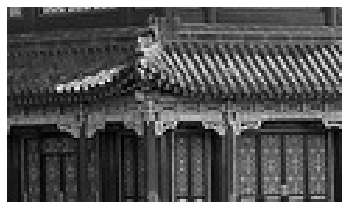

In [34]:
plot_image(images[0,:,:,0]) 

save_fig("china_original", tight_layout=False)

plt.show()   # 짜른 이미지가 나온다

In [29]:
# output 은 2장이 나올것(2장의 이미지)
plot_image(output[0,:,:,0])   
## >> 0번 필터가 적용되었다 ( 0번 필터는 하얀것이 세로 였다 ) >> 0번필터는 세로줄 >> 상하의 특징만 고려되고 자우의 특징은 고려되지 않음

save_fig('china_vertical', tight_layout=False)

NameError: name 'output' is not defined

In [30]:
plot_image(output[0,:,:,1])      # 1번 필터가 적용되었다 >>  가로의 특징을 잡아냄 
save_fig('china_vertical', tight_layout=False)
plt.show()

NameError: name 'output' is not defined

In [ ]:
# 확실히 가로의 특징 ,세로의 특징을 잡아낸 그림은 다르다 >>>> 필터가 다르면 특징도 다르게 잡힌다.